In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [4]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [7]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

## 1. Linear Relationship

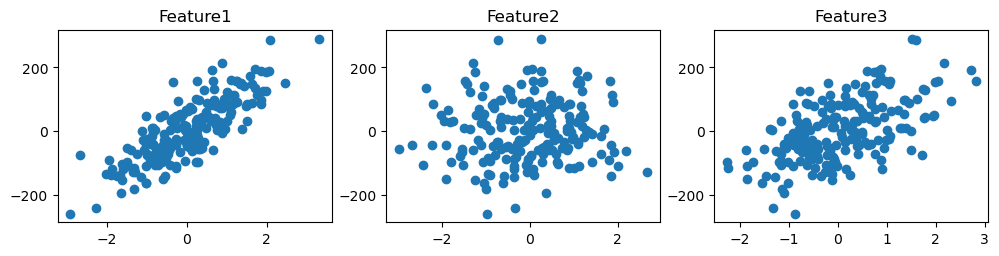

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

## 2. Multicollinearity

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [10]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<AxesSubplot:>

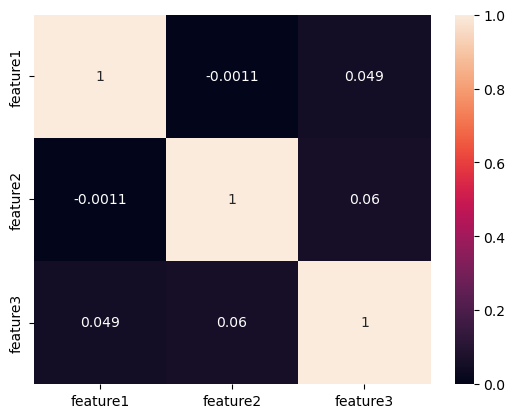

In [11]:
# Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

In [12]:
residual

array([ 32.30806809,   0.46904443, -31.32809124,  22.08116144,
       -19.48224904,  14.53811846, -13.06186752,  -6.4005597 ,
        39.20256545, -29.29044906,   4.75248151, -19.57569445,
        -3.0065195 , -10.3924627 , -21.25888025,  11.55754461,
         8.62447468, -18.07049676,  -4.94076456,  35.61424035,
        20.12399832,  12.27393405, -26.31860141, -45.95327491,
         3.37760864, -11.49543562,  10.9718074 ,   6.30338945,
       -12.76318311,   8.71883535, -14.22352902,  15.87149439,
         8.46501917,  20.24567261, -20.1977093 ,  14.87670373,
        -3.57968224,  24.32042365, -18.93235423,   4.8939494 ,
        22.49334603, -37.72924312, -28.40177141, -41.04190332,
        11.18585659,   2.09365624, -12.96308959,  18.61567073,
       -22.47871086,  12.42202957,  -2.29240143,   7.67369719,
        20.01054442,   7.09808748,   0.77941307,  33.59206216,
       -23.14001768,  20.90778006,  -2.74463247,  10.58652756])

## 3. Normality of Residual

In [14]:
plt.h(residual)

AttributeError: module 'matplotlib.pyplot' has no attribute 'histplot'

In [ ]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

## 4. Homoscedasticity

In [ ]:
plt.scatter(y_pred,residual)

## 5. Autocorrelation of Residuals

In [ ]:
plt.plot(residual)